In [2]:
s = '''
Имя
112
от dima ivashnikov для Все (7:48 PM)
350
от alexander evdokimov для Все (7:48 PM)
200
от Евгений Кувшинов для Все (7:48 PM)
300
от Aleksey Suvorov для Все (7:48 PM)
250
от Kirill Kapishevskiy для Все (7:48 PM)
160
от Anton Shishkin для Все (7:48 PM)
123
от Sergey Pakhomov для Все (7:48 PM)
380
от Andrew Ippolitov для Все (7:48 PM)
Шуховская башня :)
от Zhanerke Mukanova для Все (7:48 PM)
200
от Дегтярев Максим для Все (7:48 PM)
150 (произошел решающий лес)
от Aleksey Suvorov для Все (7:48 PM)
продано Сергею
от Юрий для Все (7:49 PM)
300
от Kirill Zhizhin для Все (7:49 PM)
300
от Evgeny Permyakov для Все (7:49 PM)
133
от Andrey  Rogatkin для Все (7:49 PM)
30м
от Сергей Королёв для Все (7:49 PM)
меньше 500
от Solomatkina Natalia для Все (7:49 PM)
800
от Anastasia Sokolova для Все (7:49 PM)
140
от Polina Rodionova для Все (7:50 PM)
400
'''

In [7]:
values = s.split('\n')[::2]

In [11]:
int_values = [int(x) for x in values if x.isdigit()]

In [13]:
int_values += [30, 500, 150]

In [15]:
import numpy as np

In [16]:
np.median(int_values)

225.0

In [17]:
np.mean(int_values)

268.22222222222223

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
from sklearn.datasets import make_classification

In [22]:
data, target = make_classification(n_samples=500)

In [28]:
from sklearn.metrics import accuracy_score

In [31]:
test, target_test = make_classification(n_samples=500)


0.52

In [100]:
accuracy_score(
    DecisionTreeClassifier(max_depth=4).fit(data, target).predict(test),
    target_test
)

0.498

In [101]:
from sklearn.datasets import make_classification, make_blobs, make_circles
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from tqdm import tqdm
from matplotlib.colors import ListedColormap

ModuleNotFoundError: No module named 'tqdm'

In [118]:
import pandas as pd

In [123]:
data = pd.DataFrame([list(range(10000))]).T

In [126]:
tqdm.tqdm.pandas(desc='pandas')

In [ ]:
data.progress_applymap(lambda x: time.sleep(1))

pandas:   0%|          | 33/10000 [00:32<2:46:55,  1.00s/it]

In [131]:
from sklearn.datasets import make_classification, make_blobs, make_circles
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from tqdm import tqdm
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


/Users/petr.ermakov/_venv/voila/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


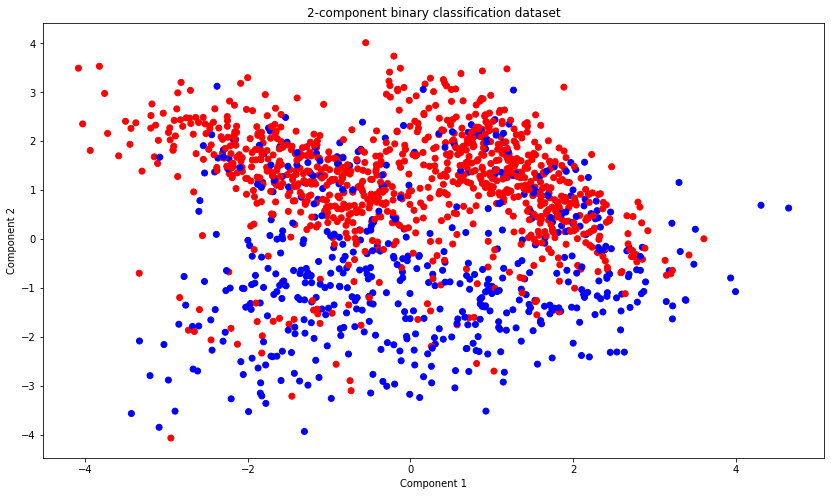

In [133]:
import random

from scipy.stats import mode
from copy import deepcopy
from scipy.stats import bernoulli

from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt

%pylab inline

X, y = make_classification(n_samples=1500,
                           n_classes=2,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=2,
                           weights=[.3,.7],
                           flip_y=0.3,
                           class_sep=1.3,
                           random_state=44)

plt.figure(figsize=(14,8))
plt.title('2-component binary classification dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.show()

In [135]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [136]:
tree_clf_1 = DecisionTreeClassifier(max_depth=20, criterion='gini')

In [137]:
tree_clf_1.fit(X_train, y_train)
y_pred = tree_clf_1.predict_proba(X_val)

In [138]:
roc_auc_score(y_val, y_pred[:,1])

0.6770482603815937

In [150]:
clfs = [
    DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=2),
    DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=8),
    DecisionTreeClassifier(max_depth=None),
]

In [160]:
import tqdm
import warnings
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_six_tree_clfs(clfs, names, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):

    plt.figure(figsize=(16,10))

    h = .02

    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    for i, (name, clf) in tqdm.notebook.tqdm(enumerate(zip(names, clfs)), total=len(clfs)):
        clf.fit(X_train, y_train)
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)

        ax = plt.subplot(2, len(clfs) / 2, i + 1)
        y_pred = clf.predict_proba(X_val)
        auc = roc_auc_score(y_val, y_pred[:,1])
        plt.title('#{}: {}. ROC AUC: {:.2f}'.format(i, name, auc))
        ax.contourf(xx, yy, Z, cmap='bwr', alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr',
                   edgecolors='k')
        # and testing points
        ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr',
                   edgecolors='k', alpha=0.6)



    plt.tight_layout()
    plt.show()

In [164]:
warnings.filterwarnings('ignore')

In [165]:
labels = ['DT, depth 1', 'DT, depth 2', 'DT, depth 3', 'DT, depth 5', 'DT, depth 25', 'DT, depth unlim']

  0%|          | 0/6 [00:00<?, ?it/s]

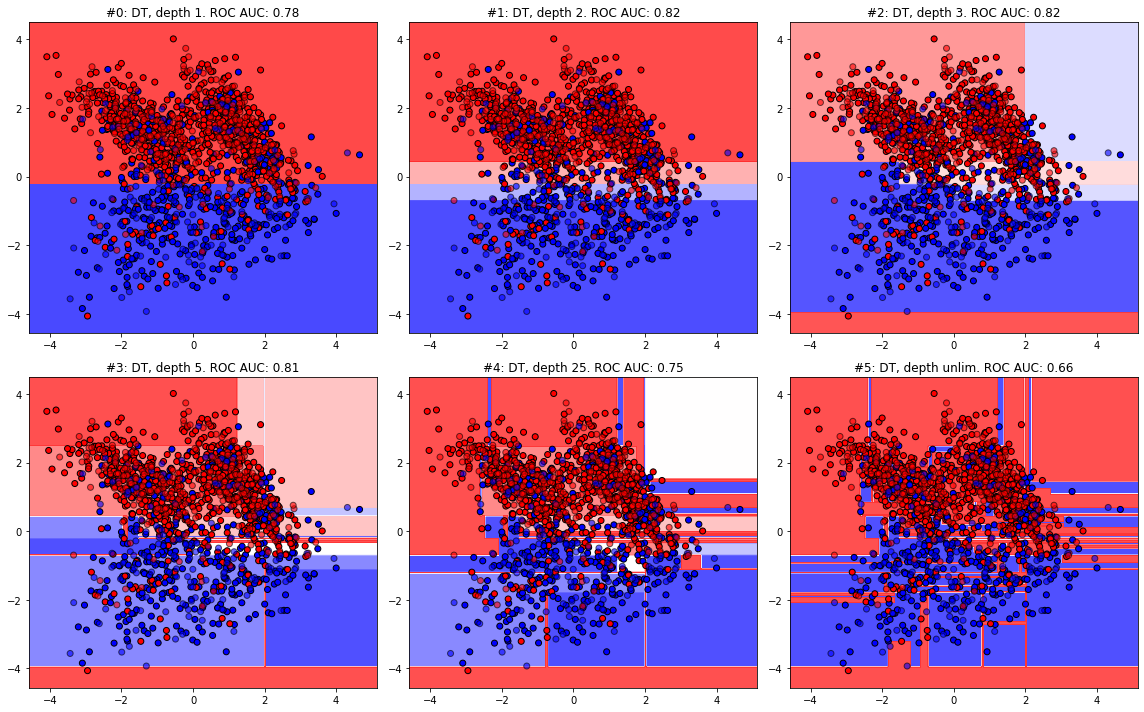

In [166]:
plot_six_tree_clfs(clfs, labels)

In [143]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

  0%|          | 0/6 [00:00<?, ?it/s]

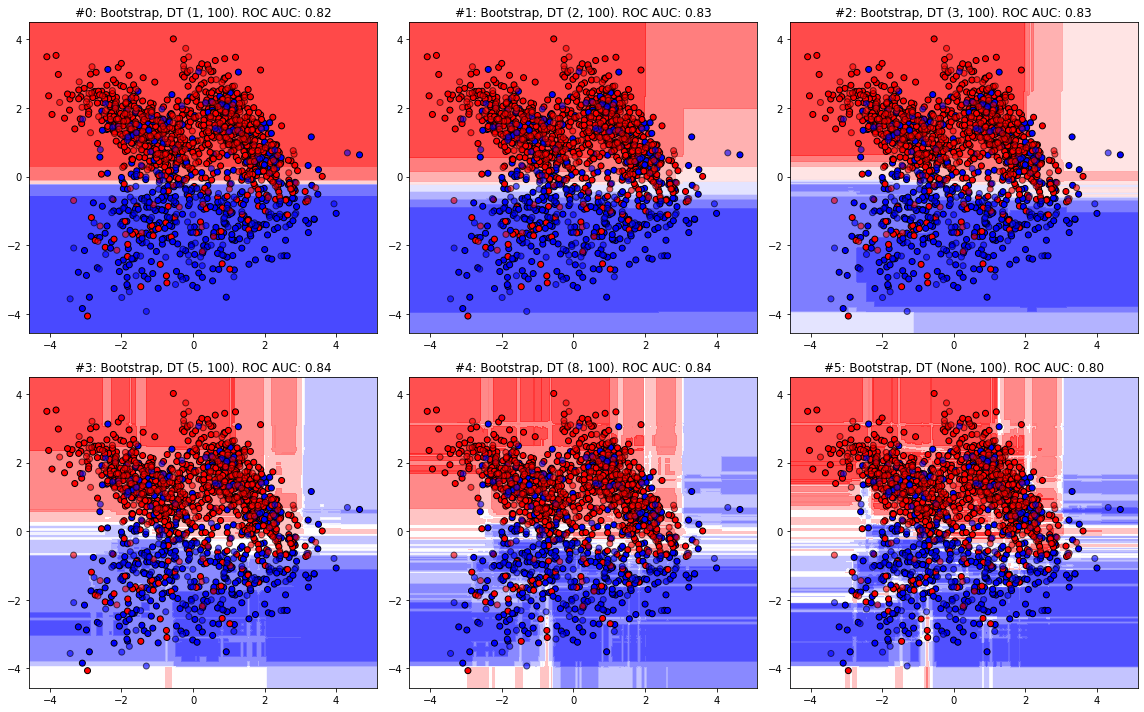

In [167]:
clfs = [
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8), n_estimators=100, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=100, oob_score=True)
]

names = ['Bootstrap, DT (1, 100)',
         'Bootstrap, DT (2, 100)',
         'Bootstrap, DT (3, 100)',
         'Bootstrap, DT (5, 100)',
         'Bootstrap, DT (8, 100)',
         'Bootstrap, DT (None, 100)']

plot_six_tree_clfs(clfs, names=names)

  0%|          | 0/6 [00:00<?, ?it/s]

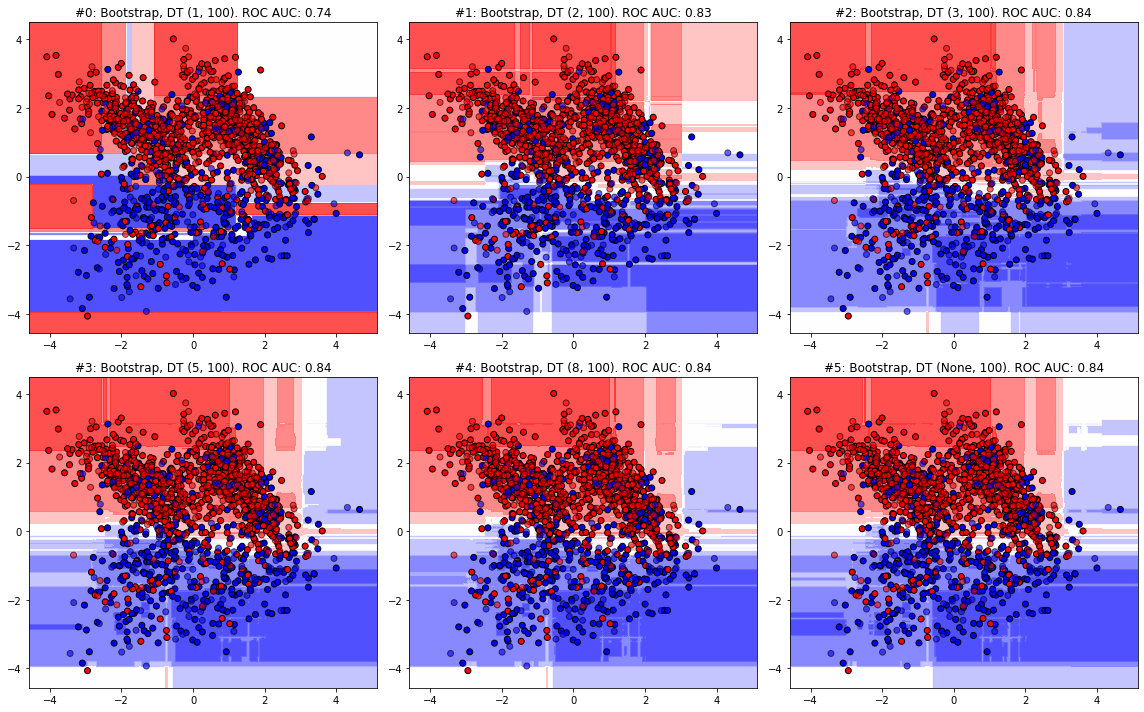

In [169]:
clfs = [
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=1, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=500, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=1000, oob_score=True),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=2000, oob_score=True)
]

names = ['Bootstrap, DT (1, 100)',
         'Bootstrap, DT (2, 100)',
         'Bootstrap, DT (3, 100)',
         'Bootstrap, DT (5, 100)',
         'Bootstrap, DT (8, 100)',
         'Bootstrap, DT (None, 100)']

plot_six_tree_clfs(clfs, names=names)

In [170]:
clfs = [
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, max_features=1), n_estimators=100),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, max_features=1), n_estimators=100),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3, max_features=1), n_estimators=100),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, max_features=1), n_estimators=100),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=8, max_features=1), n_estimators=1000),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None, max_features=1), n_estimators=1000)
]

names = ['Bagging, sub/each_split, (1, 100)',
         'Bagging, sub/each_split, (2, 100)',
         'Bagging, sub/each_split, (3, 100)',
         'Bagging, sub/each_split, (5, 100)',
         'Bagging, sub/each_split, (8, 1000)',
         'Bagging, sub/each_split, (None, 1000)']

  0%|          | 0/6 [00:00<?, ?it/s]

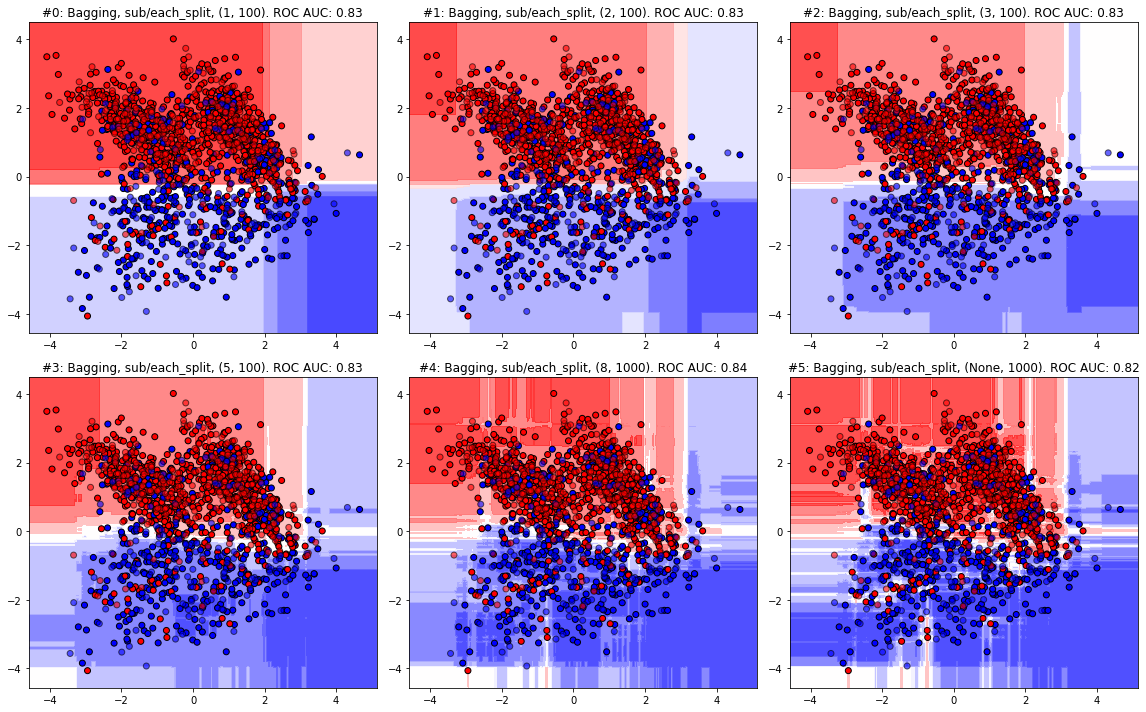

In [171]:
plot_six_tree_clfs(clfs, names)

In [172]:
clfs = [
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, max_features=1), n_estimators=10),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, max_features=1), n_estimators=50),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, max_features=1), n_estimators=100),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, max_features=1), n_estimators=500),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, max_features=1), n_estimators=2000),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5, max_features=1), n_estimators=4000)
]

names = ['Bagging, sub/each_split, (5, 10)',
         'Bagging, sub/each_split, (5, 50)',
         'Bagging, sub/each_split, (5, 100)',
         'Bagging, sub/each_split, (5, 500)',
         'Bagging, sub/each_split, (5, 2000)',
         'Bagging, sub/each_split, (5, 4000)']

  0%|          | 0/6 [00:00<?, ?it/s]

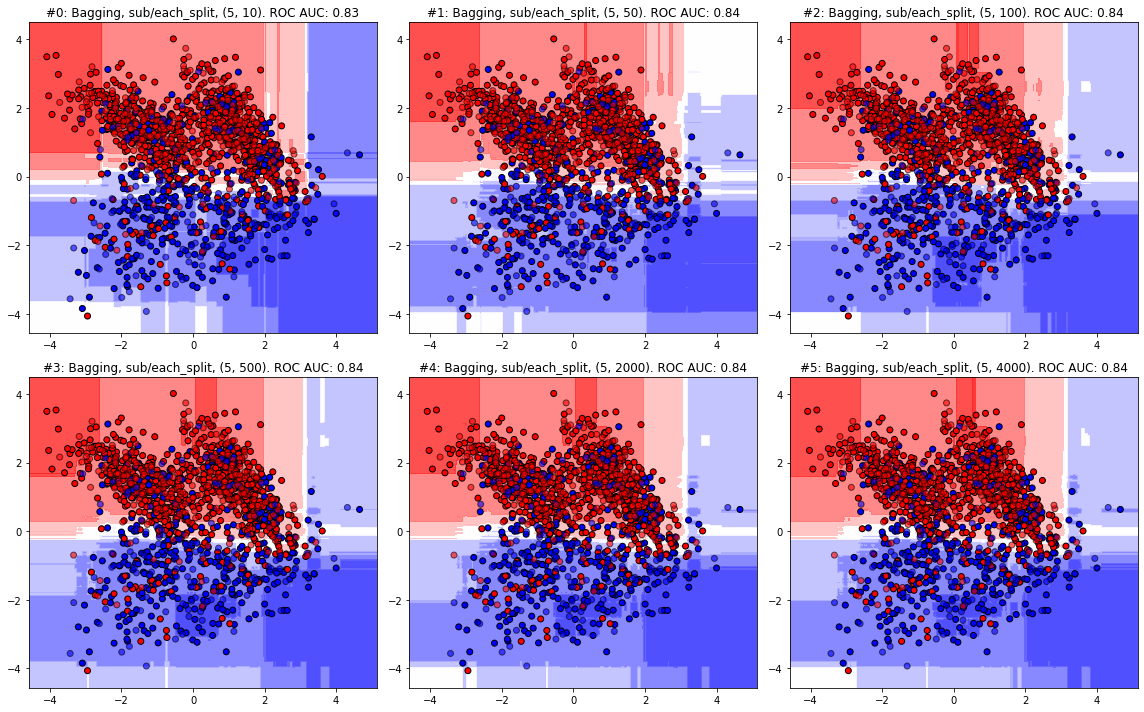

In [173]:
plot_six_tree_clfs(clfs, names)

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
clfs = [
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    RandomForestClassifier(max_depth=5, n_estimators=50, max_features=1),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    RandomForestClassifier(max_depth=5, n_estimators=500, max_features=1),
    RandomForestClassifier(max_depth=5, n_estimators=2000, max_features=1),
    RandomForestClassifier(max_depth=5, n_estimators=4000, max_features=1),
]

names = ['RF, (5, 10)',
         'RF, (5, 50)',
         'RF, (5, 100)',
         'RF, (5, 500)',
         'RF, (5, 2000)',
         'RF, (5, 4000)']

  0%|          | 0/6 [00:00<?, ?it/s]

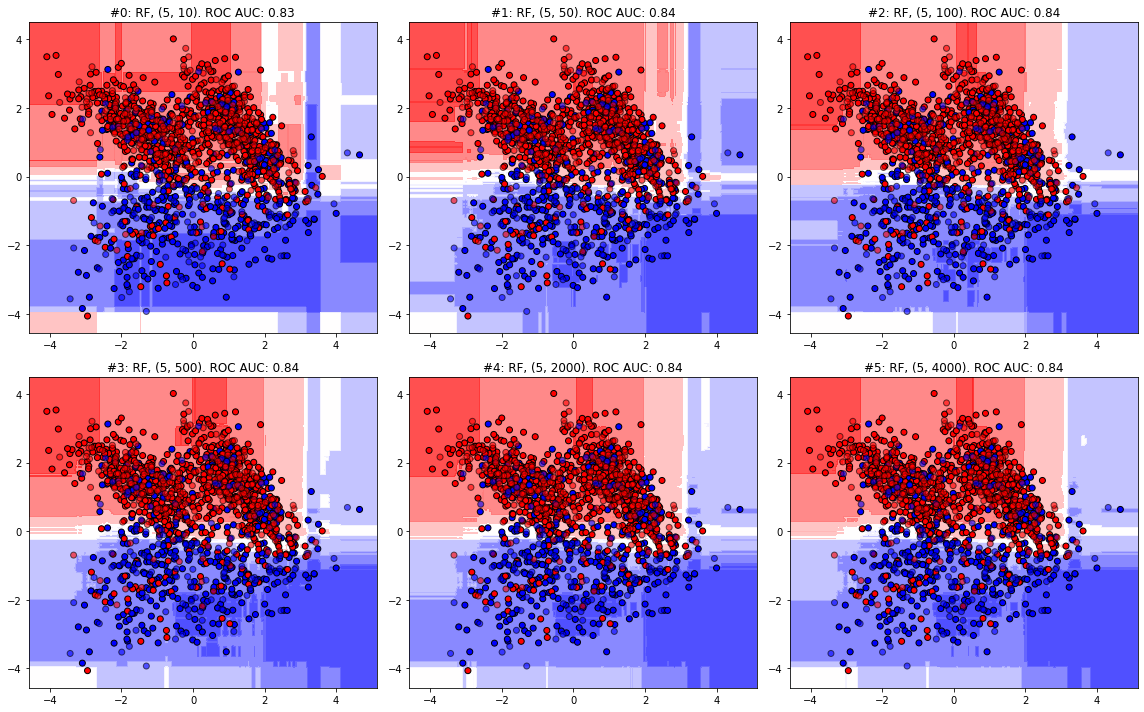

In [176]:
plot_six_tree_clfs(clfs, names)

In [207]:
import pandas as pd

dfx = pd.read_csv('x_train.csv', sep=';')
dfy = pd.read_csv('y_train.csv', names=['target'])

In [208]:
X = dfx.values
y = dfy.values.flatten()

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [182]:
dfx.head().T

0             1         2  \
maxPlayerLevel                      3.900000e+01  2.100000e+01       5.0   
numberOfAttemptedLevels             1.000000e+01  2.200000e+01       6.0   
attemptsOnTheHighestLevel           3.000000e+00  1.900000e+01       1.0   
totalNumOfAttempts                  1.700000e+01  5.500000e+01       6.0   
averageNumOfTurnsPerCompletedLevel  2.444444e+01  1.704545e+01       8.4   
doReturnOnLowerLevels               1.000000e+00  1.000000e+00       0.0   
numberOfBoostersUsed                5.000000e+00  6.000000e+00       1.0   
fractionOfUsefullBoosters           4.000000e-01  3.333333e-01       1.0   
totalScore                          2.650000e+06  5.614000e+06  857000.0   
totalBonusScore                     1.375000e+03  3.825000e+03    1150.0   
totalStarsCount                     2.100000e+01  5.100000e+01      14.0   
numberOfDaysActuallyPlayed          2.000000e+00  4.000000e+00       1.0   

                                           3         4  
maxPlayerLevel                          21.0       4.0  
numberOfAttemptedLevels                  2.0       5.0  
attemptsOnTheHighestLevel                5.0       1.0  
totalNumOfAttempts                       6.0       5.0  
averageNumOfTurnsPerCompletedLevel      19.0       9.6  
doReturnOnLowerLevels                    0.0       0.0  
numberOfBoostersUsed                     1.0       1.0  
fractionOfUsefullBoosters                0.0       1.0  
totalScore                          120000.0  857000.0  
totalBonusScore                          0.0    1075.0  
totalStarsCount                          1.0      12.0  
numberOfDaysActuallyPlayed               1.0       1.0

In [184]:
cv = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)
scoring = 'roc_auc'

In [185]:
model = DecisionTreeClassifier()

In [186]:
depths = range(1, 10)
_, tree_test_scores = validation_curve(model, X, y, 
                                       param_name='max_depth',
                                       param_range=depths, 
                                       scoring=scoring, cv=cv, n_jobs=-1)

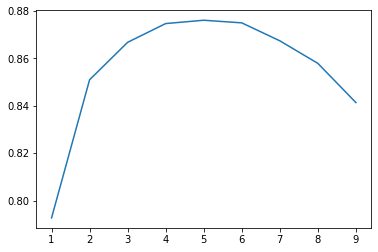

In [187]:
plt.plot(depths, tree_test_scores.mean(axis=1))

In [188]:
from sklearn.ensemble import BaggingClassifier

In [191]:
model = BaggingClassifier(DecisionTreeClassifier(), 
                          n_estimators=50, random_state=123)

In [190]:
_, bag_test_scores = validation_curve(model, X, y, 
                                      param_name='base_estimator__max_depth', 
                                      param_range=depths, 
                 scoring=scoring, cv=cv, n_jobs=1)

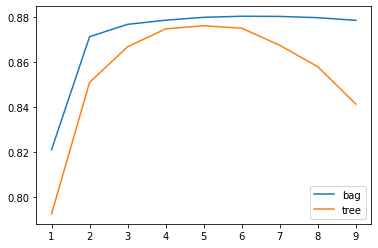

In [192]:
plt.plot(depths, bag_test_scores.mean(axis=1), label='bag')
plt.plot(depths, tree_test_scores.mean(axis=1), label='tree')
plt.legend()

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
model = RandomForestClassifier(random_state=123, n_estimators=50, 
                               n_jobs=1)
model.fit(X, y)

RandomForestClassifier(n_estimators=50, n_jobs=1, random_state=123)

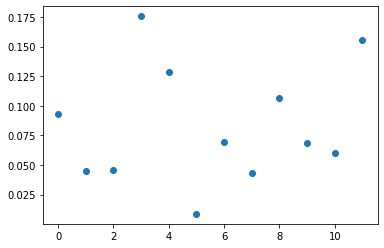

In [195]:
scatter(range(len(model.feature_importances_)), model.feature_importances_)

In [196]:
model.feature_importances_

array([0.09333813, 0.04455932, 0.04554193, 0.17565645, 0.12872745,
       0.00868933, 0.06913664, 0.04315746, 0.10628113, 0.06884553,
       0.06054581, 0.15552083])

In [197]:
_, forest_test_scores = validation_curve(model, X, y, 
                                         param_name='max_depth', 
                                         param_range=depths, 
                 scoring=scoring, cv=cv, n_jobs=1)

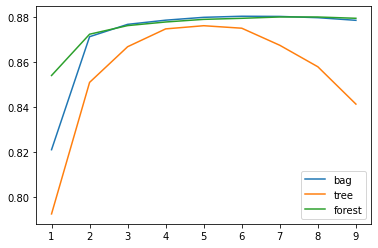

In [198]:
plt.plot(depths, bag_test_scores.mean(axis=1), label='bag')
plt.plot(depths, tree_test_scores.mean(axis=1), label='tree')
plt.plot(depths, forest_test_scores.mean(axis=1), label='forest')
plt.legend()

In [200]:
_, forest_test_scores = validation_curve(model, X, y, 
                                         param_name='n_estimators', 
                                         param_range=[1, 10, 100, 500, 1000, 2000, 10000], 
                 scoring=scoring, cv=cv, n_jobs=-1, verbose=666)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  28 | elapsed:    2.1s remaining:   57.9s
[Parallel(n_jobs=-1)]: Done   2 out of  28 | elapsed:    2.3s remaining:   29.3s
[Parallel(n_jobs=-1)]: Done   3 out of  28 | elapsed:    3.2s remaining:   26.5s
[Parallel(n_jobs=-1)]: Done   4 out of  28 | elapsed:    3.2s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done   5 out of  28 | elapsed:    8.7s remaining:   40.1s
[Parallel(n_jobs=-1)]: Done   6 out of  28 | elapsed:    9.0s remaining:   33.0s
[Parallel(n_jobs=-1)]: Done   7 out of  28 | elapsed:   34.4s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   8 out of  28 | elapsed:   34.6s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   9 out of  28 | elapsed:   35.4s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  28 | elapsed:   35.7s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  11 out of  28 | elapsed:   41.2s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  12 o

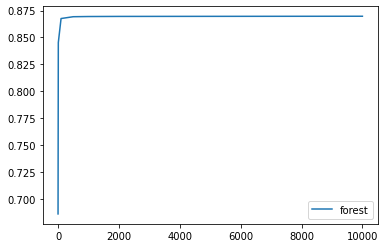

In [203]:
plt.plot([1, 10, 100, 500, 1000, 2000, 10000], forest_test_scores.mean(axis=1), label='forest')
plt.legend()

In [205]:
forest_test_scores.mean(axis=1)

array([0.68581997, 0.8451873 , 0.86754875, 0.86923257, 0.86941744,
       0.86951591, 0.86967486])

In [227]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
OneHotEncoder

In [220]:
from sklearn import pipeline

In [221]:
pipeline.make_union

<function sklearn.pipeline.make_union(*transformers, n_jobs=None, verbose=False)>

In [233]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression())])

In [214]:
pipeline.fit(X[only_my_f], y)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [219]:
pipeline.predict_proba(X)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [222]:
dfx

maxPlayerLevel  numberOfAttemptedLevels  attemptsOnTheHighestLevel  \
0                  39                       10                          3   
1                  21                       22                         19   
2                   5                        6                          1   
3                  21                        2                          5   
4                   4                        5                          1   
...               ...                      ...                        ...   
25284               3                        4                          1   
25285               8                        9                          1   
25286               6                        7                          2   
25287              55                        1                          1   
25288               1                        2                          1   

       totalNumOfAttempts  averageNumOfTurnsPerCompletedLevel  \
0                      17                           24.444444   
1                      55                           17.045455   
2                       6                            8.400000   
3                       6                           19.000000   
4                       5                            9.600000   
...                   ...                                 ...   
25284                   4                            7.000000   
25285                   9                           14.000000   
25286                   9                           10.571429   
25287                   1                           17.000000   
25288                   2                            6.000000   

       doReturnOnLowerLevels  numberOfBoostersUsed  fractionOfUsefullBoosters  \
0                          1                     5                   0.400000   
1                          1                     6                   0.333333   
2                          0                     1                   1.000000   
3                          0                     1                   0.000000   
4                          0                     1                   1.000000   
...                      ...                   ...                        ...   
25284                      0                     0                   0.000000   
25285                      0                     3                   1.000000   
25286                      0                     2                   0.500000   
25287                      1                     1                   1.000000   
25288                      0                     0                   0.000000   

       totalScore  totalBonusScore  totalStarsCount  \
0         2650000             1375               21   
1         5614000             3825               51   
2          857000             1150               14   
3          120000                0                1   
4          857000             1075               12   
...           ...              ...              ...   
25284      800000             1000                9   
25285     1833000             1775               19   
25286     1483000             1375               16   
25287      101000                0                1   
25288      376000              500                3   

       numberOfDaysActuallyPlayed  
0                               2  
1                               4  
2                               1  
3                               1  
4                               1  
...                           ...  
25284                           1  
25285                           1  
25286                           1  
25287                           1  
25288                           1  

[25289 rows x 12 columns]

In [224]:
only_mf = ['maxPlayerLevel','numberOfAttemptedLevels']

In [226]:
dfx[only_mf].values

array([[39, 10],
       [21, 22],
       [ 5,  6],
       ...,
       [ 6,  7],
       [55,  1],
       [ 1,  2]])

In [229]:
from sklearn.model_selection import GridSearchCV

In [243]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression())])

gs = GridSearchCV(
    pipeline, 
    param_grid={'scaler__with_mean': [True, False], 'model__penalty':['l1', 'l2']}, scoring=scoring).fit(X, y)

In [244]:
gs.best_params_

{'model__penalty': 'l2', 'scaler__with_mean': True}